In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
#from wordcloud import WordCloud    #library to visualize text data
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer   #Transform text to vectors.
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report,precision_score,recall_score

In [2]:
# Reading dataset
df_train = pd.read_csv(r"D:\1 Chrome Downloads\train.txt", delimiter = ';', names = ['text', 'label'])
df_val = pd.read_csv(r"D:\1 Chrome Downloads\val.txt", delimiter = ';', names = ['text', 'label'])

print(df_train.shape)
print(df_val.shape)

(16000, 2)
(2000, 2)


In [3]:
df = pd.concat([df_train,df_val])    #Merging two datasets
df.reset_index(inplace = True, drop = True)

print(df.shape) 
df.sample(5)   #Selects random sample

(18000, 2)


,text,label
17899,i feel funny inside is that a reference to the...,surprise
7651,i always feel horny nowadays,love
14718,i am just feeling shitty right now,sadness
11058,i wonder if they feel like reluctant leaders,fear
16378,i feel quite clever,joy


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

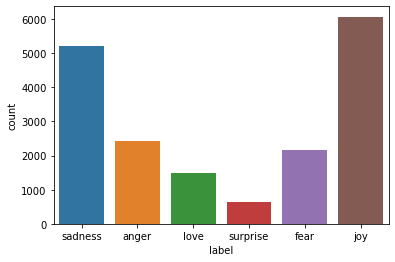

In [4]:
sns.countplot(df.label)

## <---> love, surprise, joy = positive statement
## <---> sadness, anger, fear = negative statement

In [5]:
#converting labels to manual encoder

def manual_encoder(df):
    df.replace(to_replace = "surprise", value = 1, inplace = True)
    df.replace(to_replace = "love", value = 1, inplace = True)
    df.replace(to_replace = "joy", value = 1, inplace = True)
    df.replace(to_replace = "sadness", value = 0, inplace = True)
    df.replace(to_replace = "anger", value = 0, inplace = True)
    df.replace(to_replace = "fear", value = 0, inplace = True)

In [6]:
manual_encoder(df['label'])

In [7]:
df.sample(5)

,text,label
1808,ive been having breakdowns again ive been feel...,0
7353,i am sure feeling nervous about potential air ...,0
7641,im feeling overwhelmed,1
16933,i gotta feeling that tonight s gonna be a good...,1
5380,im feeling kind of naughty,1


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

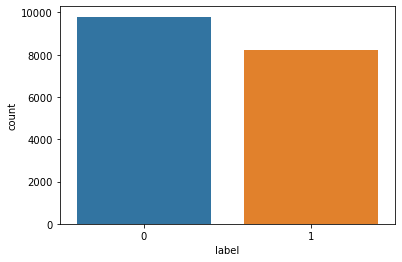

In [8]:
sns.countplot(df.label)

# Data Preprocessing

In [9]:
lm = WordNetLemmatizer()

In [10]:
def data_prep(df):
    corpus = []
    for i in df:
        item = re.sub("[^A-Za-z]"," ",str(i))
        item = item.lower() 
        item = item.split()
        item = [lm.lemmatize(word) for word in item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in item))
    return corpus
    
    

In [11]:
corpus = data_prep(df['text'])
corpus[:10]

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic']

plt.figure(figsize=(20,8))
word_cloud=""
for rows in corpus:
    for words in corpus:
        word_cloud += " ".join(words)
wordcloud = WordCloud().generate(word_cloud)
plt.imshow(wordcloud)

## Bag of words

In [12]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
x = traindata
y = df['label']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [14]:
nv = MultinomialNB()

In [15]:
nv.fit(x_train, y_train)

MultinomialNB()

In [16]:
ypred = nv.predict(x_test)

In [17]:
print('###### confusion matrix ######\n')
print(confusion_matrix(y_test, ypred))
print('\n###### classification report ######\n')
print(classification_report(y_test, ypred))
print('\n accuracy score :', accuracy_score(y_test, ypred))
print('\n precision score :', precision_score(y_test, ypred))
print('\n recall score :', recall_score(y_test, ypred))

###### confusion matrix ######

[[1924   74]
 [ 135 1467]]

###### classification report ######

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1998
           1       0.95      0.92      0.93      1602

    accuracy                           0.94      3600
   macro avg       0.94      0.94      0.94      3600
weighted avg       0.94      0.94      0.94      3600


 accuracy score : 0.9419444444444445

 precision score : 0.9519792342634653

 recall score : 0.9157303370786517


In [18]:
df_test=pd.read_csv(r"D:\1 Chrome Downloads\test.txt", delimiter=';', names = ['text','label'])
df_test.sample(4)

,text,label
1092,i been that i feel like i can traipse in and o...,love
1169,ive left the orange scented mixture white but ...,joy
615,i feel that the packaging is really lovely and...,love
864,i feel reassured that the county government in...,joy


In [19]:
manual_encoder(df_test['label'])
corpus = data_prep(df_test['text'])
testdata = cv.transform(corpus)
pred = nv.predict(testdata)

In [20]:
print('###### confusion matrix ######\n')
print(confusion_matrix(df_test['label'], pred))
print('\n###### classification report ######\n')
print(classification_report(df_test['label'], pred))
print('\n accuracy score :', accuracy_score(df_test['label'], pred))
print('\n precision score :', precision_score(df_test['label'], pred))
print('\n recall score :', recall_score(df_test['label'], pred))

###### confusion matrix ######

[[1047   33]
 [  70  850]]

###### classification report ######

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1080
           1       0.96      0.92      0.94       920

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000


 accuracy score : 0.9485

 precision score : 0.9626274065685164

 recall score : 0.9239130434782609
